<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/Resnet50_SatelliteImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers.core import Dense,Flatten
#from tensorflow.keras import layers,Dense,Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gZ889YZoIUvo6Bvc6lsU")
project = rf.workspace("sjsu").project("building-image")
dataset = project.version(13).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Building-Image-13 in coco:: 100%|██████████| 700/700 [00:00<00:00, 1334.10it/s]


In [4]:
import json
json_path= '/content/Building-Image-13/train/_annotations.coco.json'
file = open(json_path)
json_data= json.load(file)
print(json_data)
categories = (json_data['categories'])
annotations= (json_data['annotations'])
image_paths = json_data['images']

{'info': {'year': '2022', 'version': '13', 'description': 'Exported from roboflow.ai', 'contributor': '', 'url': 'https://public.roboflow.ai/object-detection/undefined', 'date_created': '2022-07-12T05:17:46+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/publicdomain/zero/1.0/', 'name': 'Public Domain'}], 'categories': [{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 

In [5]:
print(categories)

[{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}, {'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}, {'

In [6]:
import os
base_train_path = '/content/Building-Image-13/train/'
category_map = {}
for category in categories:
  if category['supercategory']!= 'none':
    print(category)
    os.mkdir(base_train_path + category['name'])
    category_map[category['id']] = category['name'] 

category_map

{'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}
{'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}
{'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}
{'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}
{'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}
{'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}
{'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 14, 'name': 'Unknownshape-Roof', 'supercategory': 'Building-Roof'}


{1: 'Building-Roof',
 2: 'Commercial-Flat-Roof',
 3: 'Commercial-Slope-Roof',
 4: 'Construction-Area',
 5: 'Flat Roof',
 6: 'Land',
 7: 'Playground',
 8: 'Slope-Flat-Roof',
 9: 'Slope-Roof',
 10: 'Solar-Flat-Roof',
 11: 'Solar-Pannel-Ground',
 12: 'Solar-Slope-Roof',
 13: 'TreeShading-Slope-Roof',
 14: 'Unknownshape-Roof'}

In [7]:
image_id_map = {}
for image_path in image_paths:
  #print(image_path)
  image_id_map[image_path['id']] = image_path['file_name']
print(image_id_map)


for images in annotations:
  print(images)
  source_path = base_train_path + image_id_map[images['id']]
  destination_path = base_train_path + category_map[images['category_id']]+"/" + image_id_map[images['id']]
  #print(source_path)
  #print(destination_path)
  os.rename(source_path, destination_path)

{0: 'Screen-Shot-2022-06-23-at-6-14-36-PM_png.rf.000df05b288a9f96a2fb80a84352a61d.jpg', 1: 'Screen-Shot-2022-06-22-at-9-32-26-PM_png.rf.0030a6a60ecfd430a64f7b28e9b7ab79.jpg', 2: 'Screen-Shot-2022-06-23-at-6-13-47-PM_png.rf.00599ddd0fc456be35ea52bf3250ac3f.jpg', 3: 'Screen-Shot-2022-06-23-at-6-14-12-PM_png.rf.00965a12c310eb105a9a85e2d3c8ef78.jpg', 4: 'Screen-Shot-2022-06-22-at-7-01-13-PM_png.rf.00b77fe10f1c3253f7d1781f7687a872.jpg', 5: 'Screen-Shot-2022-06-22-at-9-32-12-PM_png.rf.00c1af57b5dd53b7ae36d41cf359f988.jpg', 6: 'MountainView_12_png.rf.006e143806d2f7709c1be9370718820a.jpg', 7: 'MountainView_33_png.rf.013723ec7e514dd6ed1c903e2ab5b39b.jpg', 8: 'Screen-Shot-2022-06-23-at-6-12-16-PM_png.rf.02033888d80e4b302b7b4d5140b1139a.jpg', 9: 'Screen-Shot-2022-06-23-at-6-08-20-PM_png.rf.021c38f0ed7b6cc9212cd7968d0d349b.jpg', 10: 'Screen-Shot-2022-06-23-at-6-10-26-PM_png.rf.0325455b2fbc1dc862ac37a92191fe3f.jpg', 11: 'Screen-Shot-2022-06-23-at-11-55-28-AM_png.rf.034f9e8d12845f7c154d6132748796e1.

In [14]:
data_dir= '/content/Building-Image-13/train'
print(data_dir)

!rm -rf '/content/Building-Image-13/train/.ipynb_checkpoints'

/content/Building-Image-13/train


In [15]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 696 files belonging to 14 classes.
Using 557 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 696 files belonging to 14 classes.
Using 139 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['Building-Roof', 'Commercial-Flat-Roof', 'Commercial-Slope-Roof', 'Construction-Area', 'Flat Roof', 'Land', 'Playground', 'Slope-Flat-Roof', 'Slope-Roof', 'Solar-Flat-Roof', 'Solar-Pannel-Ground', 'Solar-Slope-Roof', 'TreeShading-Slope-Roof', 'Unknownshape-Roof']


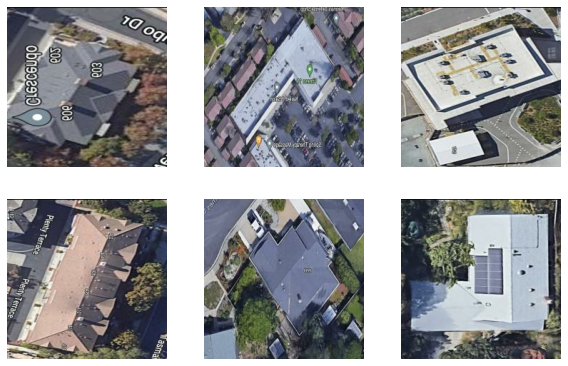

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  #print(labels)
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    #print(labels[0:1])
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=14,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [27]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(14, activation='softmax'))

In [28]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 14)                7182      
                                                                 
Total params: 24,643,982
Trainable params: 1,056,270
Non-trainable params: 23,587,712
_________________________________________________________________


In [29]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])




In [60]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
18/18 [==============================] - 95s 5s/step - loss: 0.8249 - accuracy: 0.7235 - val_loss: 2.0155 - val_accuracy: 0.4748
Epoch 2/10
18/18 [==============================] - 96s 5s/step - loss: 0.7181 - accuracy: 0.7720 - val_loss: 2.1424 - val_accuracy: 0.3669
Epoch 3/10
18/18 [==============================] - 95s 5s/step - loss: 0.5219 - accuracy: 0.8151 - val_loss: 2.2313 - val_accuracy: 0.4029
Epoch 4/10
18/18 [==============================] - 95s 5s/step - loss: 0.4046 - accuracy: 0.8725 - val_loss: 2.2713 - val_accuracy: 0.4029
Epoch 5/10
18/18 [==============================] - 95s 5s/step - loss: 0.3526 - accuracy: 0.9138 - val_loss: 2.3940 - val_accuracy: 0.3669
Epoch 6/10
18/18 [==============================] - 95s 5s/step - loss: 0.2420 - accuracy: 0.9533 - val_loss: 2.4495 - val_accuracy: 0.3597
Epoch 7/10
18/18 [==============================] - 97s 5s/step - loss: 0.2388 - accuracy: 0.9408 - val_loss: 2.6351 - val_accuracy: 0.5036
Epoch 8/10
18/18 [==

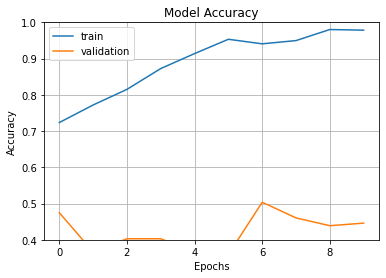

In [61]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


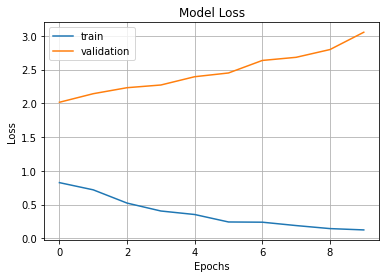

In [62]:
#fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [63]:
import cv2
def predictor(predict_img):
  image=cv2.imread(str(predict_img))
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  PIL.Image.open(str(predict_img))
  pred=resnet_model.predict(image)
  output_class=class_names[np.argmax(pred)]
  print("The predicted class is", output_class) 
  return True
  

['Screen-Shot-2022-06-22-at-10-30-34-PM_png.rf.c98605624f6a74d0d16901d00e316105.jpg', 'Screen-Shot-2022-06-23-at-6-17-22-PM_png.rf.6bb3b8081ef7bfe775ff5ffd20e28342.jpg', 'Screen-Shot-2022-06-23-at-6-12-43-PM_png.rf.93619cdc2418eb5cd3938b02b5c284c3.jpg', 'Screen-Shot-2022-06-23-at-6-17-22-PM_png.rf.250a78718e239061fc2b9afecd529dd5.jpg', 'Screen-Shot-2022-06-23-at-6-16-16-PM_png.rf.c7b5e1fcd494e9787c8692c4b6116767.jpg', 'Screen-Shot-2022-06-22-at-7-00-43-PM_png.rf.ab3148475f008fd5dafda4cc0b6099c8.jpg', 'Screen-Shot-2022-06-23-at-11-53-27-AM_png.rf.95ff042ec853bd7feff95c275bc49922.jpg', 'MountainView_23_png.rf.5d4adcf0018b7bef99f9552f26082f87.jpg', 'MountainView_20_png.rf.187d5dce41f6c086f8dab52f38e27df1.jpg', 'MountainView_47_png.rf.b239e0af1f5f0b3098dea21500f2ce83.jpg', 'Screen-Shot-2022-06-23-at-6-11-10-PM_png.rf.f655bf1d5e142e7d72cd9609afde66cf.jpg']
The predicted class is Commercial-Flat-Roof


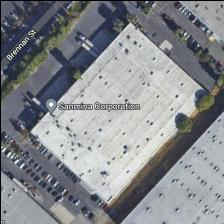

In [64]:
#print(list(data_dir.glob()))
import os

folder_path = data_dir+'/Commercial-Flat-Roof/'
commercial_flat_roof = os.listdir(folder_path)
#print(commercial_flat_roof)

predictor(folder_path+commercial_flat_roof[1])
PIL.Image.open(str(folder_path+commercial_flat_roof[1]))



['Screen-Shot-2022-06-23-at-6-18-48-PM_png.rf.f1fc24d9b53f378bd2ef23b3978de2a1.jpg', 'Screen-Shot-2022-06-22-at-10-31-55-PM_png.rf.f185c8a7c5e620ed0234df5b9337d437.jpg', 'Screen-Shot-2022-06-23-at-11-54-05-AM_png.rf.19a809eae71cdb7308ec907041db68ed.jpg', 'Screen-Shot-2022-06-22-at-7-00-49-PM_png.rf.eaaba670869b99c1df030f7c5a1eec18.jpg', 'Screen-Shot-2022-06-23-at-6-12-24-PM_png.rf.abc8f0e81846bd0e807a6ef60cff6b9e.jpg', 'Screen-Shot-2022-06-22-at-9-27-47-PM_png.rf.6e25b0f836e72b62b7b8273fa6db44ad.jpg', 'Screen-Shot-2022-06-22-at-9-35-03-PM_png.rf.5c9f880c8ed0a64563b17281a95345bd.jpg', 'MountainView_46_png.rf.98df5dc223ffdcc75ce1774852823bb7.jpg', 'Screen-Shot-2022-06-23-at-6-08-20-PM_png.rf.eff028530ee0e06d72643524f5a63d06.jpg', 'Screen-Shot-2022-06-22-at-9-20-30-PM_png.rf.56806f34df45fa9ea57c78613916ae23.jpg', 'MountainView_38_png.rf.2c1d512c7401a498a30ff48d941b8c5c.jpg', 'Screen-Shot-2022-06-23-at-6-16-30-PM_png.rf.8c6333266053ccc02fb2793a442cea19.jpg', 'Screen-Shot-2022-06-23-at-11-5

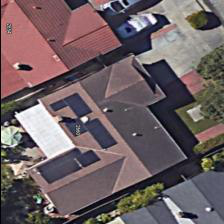

In [66]:
folder_path = data_dir+'/Solar-Slope-Roof/'
solar_slope_roof = os.listdir(folder_path)
#print(solar_slope_roof)

predictor(folder_path+solar_slope_roof[1])
PIL.Image.open(str(folder_path+solar_slope_roof[1]))